Text(0, 0.5, 'Balance')

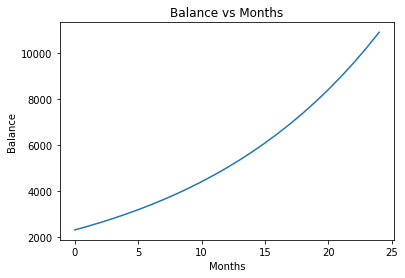

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df["months"] = [i for i in range(25)]

func = lambda x: 2300*(1 + 0.065/12)**(12*x)

df["balance"] = [func(i) for i in df["months"]]
plt.plot(df["months"],df["balance"])
plt.xlabel("Months")
plt.title("Balance vs Months")
plt.ylabel("Balance")

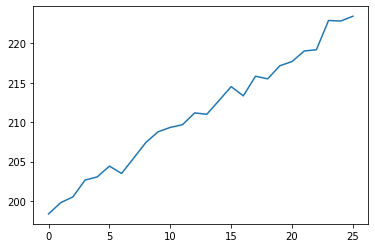

In [47]:
import random
import matplotlib.pyplot as plt

def sma(data, period):
    averages = []
    avg = 0
    for i, val in enumerate(data):
        if i < period:
            averages.append(None)
        else:
            averages.append(sum(data[(i - period):i])/period)
    return averages
time = [i for i in range(26)]
line1 = [200 + i + -3*random.random() for i in time]
#print(sma(line1, 5))
df = pd.DataFrame()
df["Closing Price"] = line1
df["Days"] = time
df.set_index("Days", inplace = True)
df.to_csv("ua_12.csv")
plt.plot(time, line1)

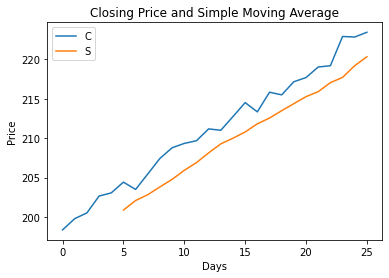

In [57]:
plt.plot(time, line1, sma(line1, 5))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Closing Price and Simple Moving Average")
plt.legend("CS")

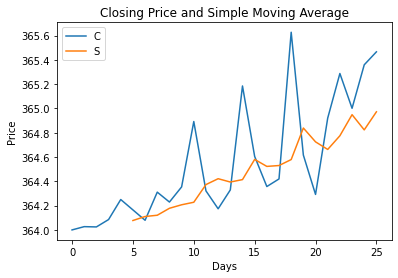

In [63]:
line2 = [364 + i*random.random()/10 for i in time]
plt.plot(time, line2, sma(line2, 5))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Closing Price and Simple Moving Average")
plt.legend("CS")

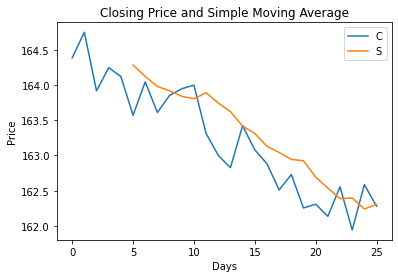

In [66]:
line3 = [164 - i/10 + random.random() for i in time]
plt.plot(time, line3, sma(line3, 5))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Closing Price and Simple Moving Average")
plt.legend("CS")

In [69]:
df = pd.DataFrame()
df["A"] = line1
df["SMA_A_5"] = sma(line1,5)
df["SMA_A_7"] = sma(line1,7)
df["B"] = line2
df["SMA_B_5"] = sma(line2,5)
df["C"] = line1
df["SMA_C_5"] = sma(line3,5)
df.to_csv("ua_12_graphs.csv")

In [147]:
candle_df = pd.DataFrame()
candle_df["Date"] = [i for i in range(1,25)]
candle_df.set_index("Date", inplace = True)

f = lambda x: 120 + x/10 + random.random()
candle_df["Open"] = [f(i) for i in candle_df.index]
candle_df["Close"] = [candle_df["Open"][i] + random.randint(-3,3)*random.random() for i in candle_df.index]
candle_df["High"] = [max(candle_df["Open"][i], candle_df["Close"][i]) + random.random()*random.randint(1,3) for i in candle_df.index]
candle_df["Low"] = [min(candle_df["Open"][i], candle_df["Close"][i]) + random.random()*random.randint(-3, -1) for i in candle_df.index]
candle_df = round(candle_df,2)
candle_df.to_csv("ua_12_candlestick.csv")


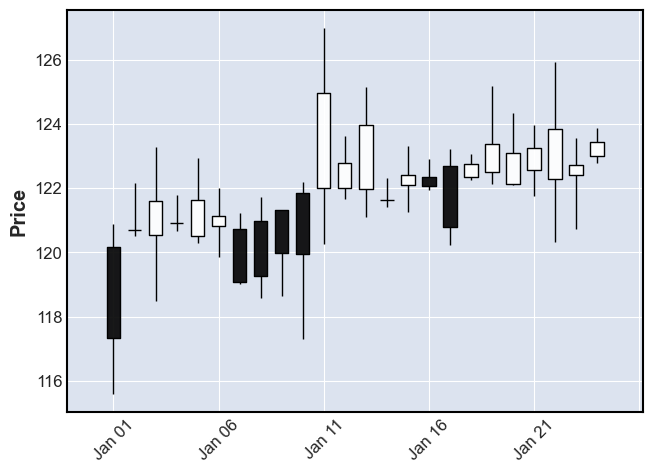

In [148]:
import mplfinance as mpf
import pandas as pd
import matplotlib.dates as mpl_dates

myData = "ua_12_candlestick.csv"
myDf = pd.read_csv(myData, index_col = 'Date')
myDf.index = pd.to_datetime(myDf.index, format = "%d")

mpf.plot(myDf, type = 'candlestick')

Text(0.5, 1.0, 'Closing Price')

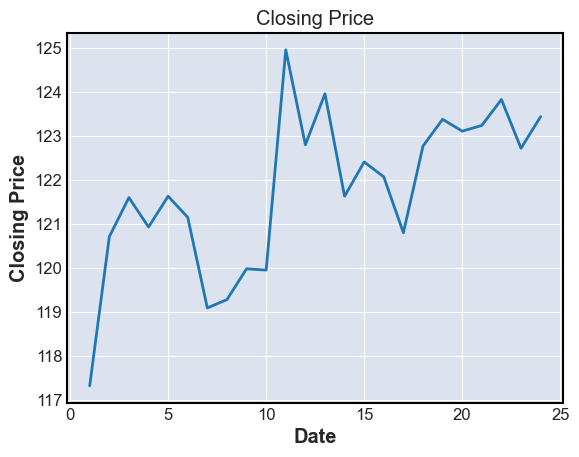

In [161]:
plt.plot(candle_df.index, candle_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price")

Text(0.5, 1.0, '3-Day Simple Moving Average')

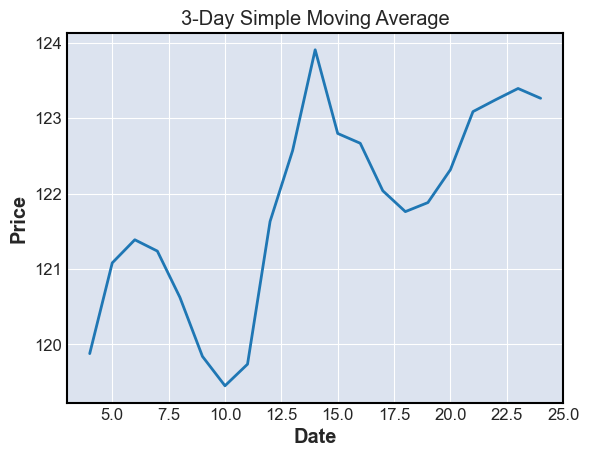

In [164]:
plt.plot(candle_df.index, sma(candle_df["Close"], 3))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("3-Day Simple Moving Average")

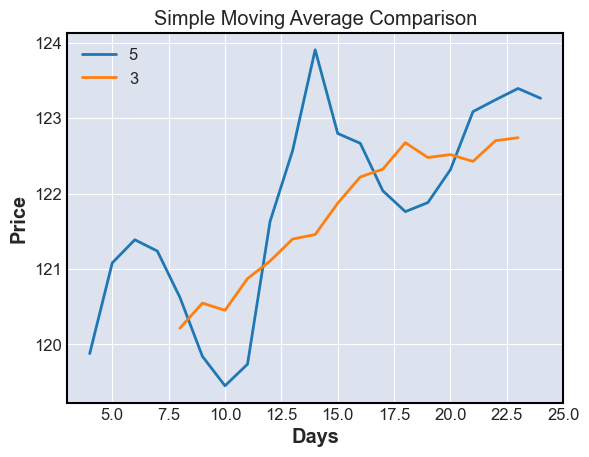

In [165]:
plt.plot(candle_df.index, sma(candle_df["Close"], 3), sma(candle_df["Close"], 8))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Simple Moving Average Comparison")
plt.legend("53")

Text(0, 0.5, 'Balance')

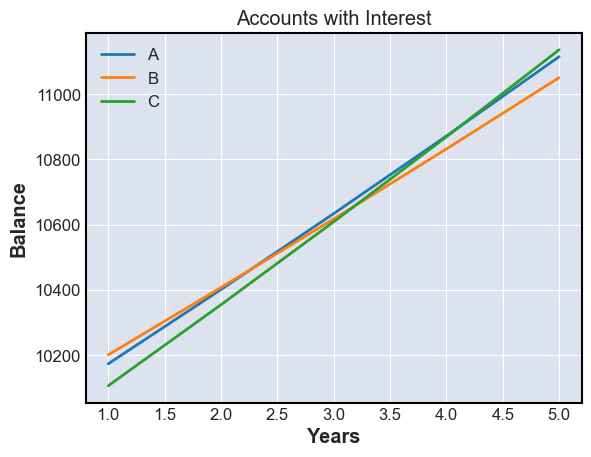

In [181]:
df = pd.read_csv("ua_13.csv")
plt.plot(df["Year"], df["A"], label = "A")
plt.plot(df["Year"], df["B"], label = "B")
plt.plot(df["Year"], df["C"], label = "C")
plt.legend()
plt.title("Accounts with Interest")
plt.xlabel("Years")
plt.ylabel("Balance")